In [1]:
!pip install -q seaborn

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.6.0


In [4]:
np.set_printoptions(precision=3, suppress=True)

In [5]:
train_dataset = pd.read_csv('https://raw.githubusercontent.com/Saketspradhan/Stock-Market-Analysis-System/main/fundamentally%20strong%20companies%20v4_train.csv')
test_dataset = pd.read_csv('https://raw.githubusercontent.com/Saketspradhan/Stock-Market-Analysis-System/main/fundamentally%20strong%20companies%20v4_test.csv') 

In [6]:
train_dataset.head()

,Name,CMP,Price_to_Earnings,Market_Capitalization,Dividend_Yield,Net_Profit_last_Quarter,YOY_Quarterly_Profit_Growth,Sales_last_Quarter,YOY_Quarterly_Sales_Growth,Return_on_Capital_Employed,Sales_Growth_3_Years,Profit_Growth_3_Years,Debt_to_Equity
0,Ksolves India,572.50,42.58,339.38,5.68,4.00,354.55,9.60,126.95,161.06,91.53,410.23,0.00
1,Nestle India,18273.30,79.70,176236.10,1.09,538.58,10.68,3476.70,13.97,139.29,10.07,19.34,0.07
2,Goenka Business,9.22,27.25,11.99,0.00,0.26,124.76,110.37,982.06,69.38,202.61,38.50,0.00
3,Tips Industries,1148.70,29.06,1510.21,0.13,14.58,139.80,28.12,87.72,64.57,23.99,140.63,0.00
4,Ajanta Soya,109.65,7.02,176.50,0.00,9.47,460.36,260.80,29.63,60.89,39.10,251.27,0.04


In [7]:
train_dataset.isna().sum()

Name                           0
CMP                            0
Price_to_Earnings              0
Market_Capitalization          0
Dividend_Yield                 0
Net_Profit_last_Quarter        0
YOY_Quarterly_Profit_Growth    0
Sales_last_Quarter             0
YOY_Quarterly_Sales_Growth     0
Return_on_Capital_Employed     0
Sales_Growth_3_Years           0
Profit_Growth_3_Years          0
Debt_to_Equity                 0
dtype: int64

In [8]:
train_dataset = train_dataset.dropna()

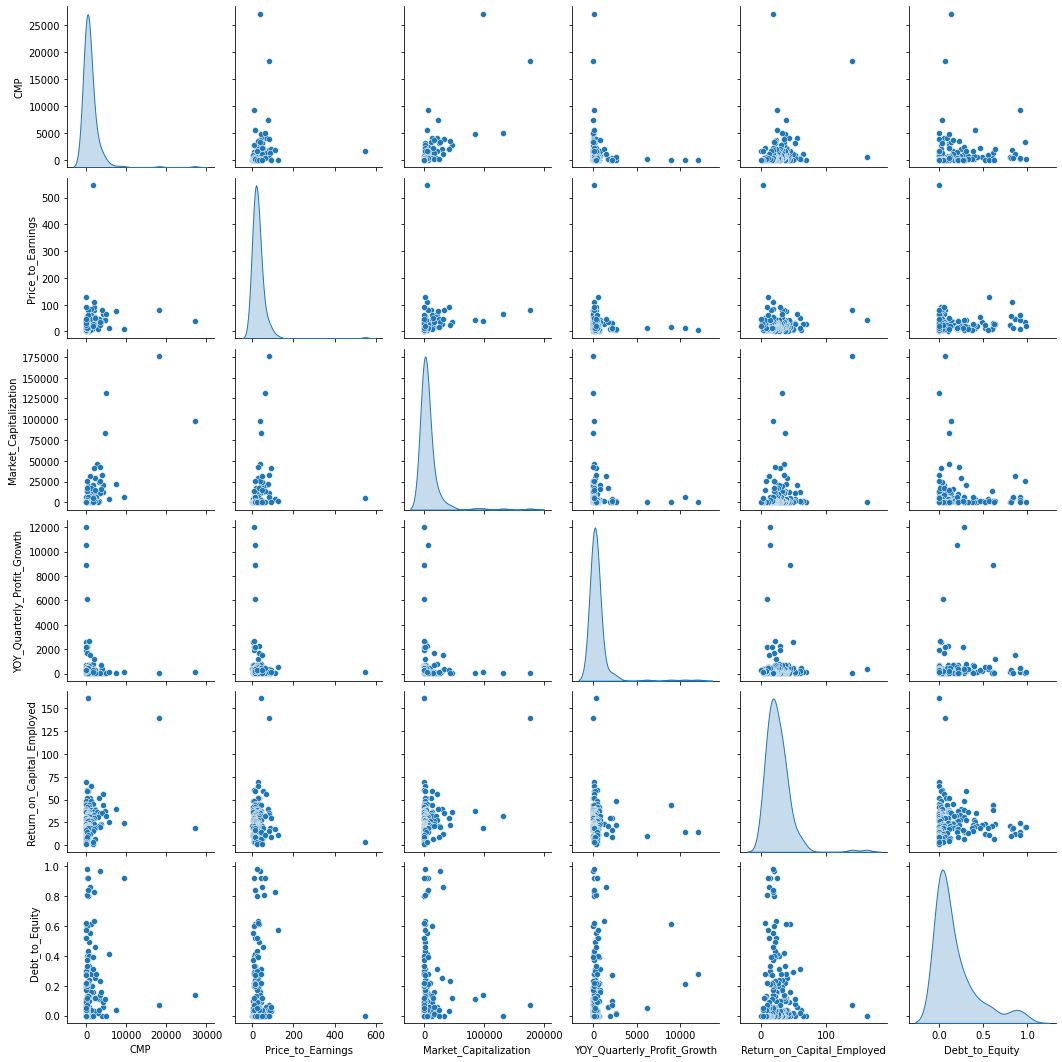

In [ ]:
sns.pairplot(train_dataset[['CMP', 'Price_to_Earnings', 'Market_Capitalization', 'YOY_Quarterly_Profit_Growth', 'Return_on_Capital_Employed', 'Debt_to_Equity']], diag_kind='kde')

In [9]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CMP,160.0,1172.634188,2853.936197,2.35,66.0375,335.025,1139.2500,27117.65
Price_to_Earnings,160.0,29.806438,46.748834,1.17,11.5650,21.030,32.9900,548.04
Market_Capitalization,160.0,7708.408625,21129.825421,2.35,81.3975,810.250,5303.6625,176236.10
Dividend_Yield,160.0,0.391563,1.006871,0.00,0.0000,0.120,0.4300,10.27
Net_Profit_last_Quarter,160.0,61.992188,118.620284,-6.03,1.3200,12.040,64.1000,629.90
YOY_Quarterly_Profit_Growth,160.0,537.046750,1536.395651,10.68,68.2275,152.060,400.0000,12011.11
Sales_last_Quarter,160.0,626.421187,1634.581966,0.02,16.7700,114.325,406.2650,15503.94
YOY_Quarterly_Sales_Growth,160.0,114.231187,280.513682,-93.10,20.7500,47.105,109.8950,2983.33
Return_on_Capital_Employed,160.0,26.012750,19.804473,0.78,14.3000,21.810,33.9650,161.06
Sales_Growth_3_Years,160.0,30.260625,32.678069,10.03,13.7650,18.150,33.9500,250.34


In [10]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('CMP')
test_labels = test_features.pop('CMP')

In [11]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
CMP,1172.634188,2853.936197
Price_to_Earnings,29.806438,46.748834
Market_Capitalization,7708.408625,21129.825421
Dividend_Yield,0.391563,1.006871
Net_Profit_last_Quarter,61.992188,118.620284
YOY_Quarterly_Profit_Growth,537.046750,1536.395651
Sales_last_Quarter,626.421187,1634.581966
YOY_Quarterly_Sales_Growth,114.231187,280.513682
Return_on_Capital_Employed,26.012750,19.804473
Sales_Growth_3_Years,30.260625,32.678069


In [12]:
train_features.pop('Name')

0         Ksolves India
1          Nestle India
2       Goenka Business
3       Tips Industries
4           Ajanta Soya
             ...       
155        LWS Knitwear
156    Ramgopal Polytex
157    Nalwa Sons Invst
158     Lee & Nee Soft.
159    Nazara Technolo.
Name: Name, Length: 160, dtype: object

In [13]:
test_features.pop('Name')

0         Vistar Amar
1    Chandra Pr. Intl
2      Godawari Power
3    Paramone Concept
4       Ajanta Pharma
5        Prince Pipes
6        Shakti Pumps
7      P I Industries
8      Canopy Finance
Name: Name, dtype: object

In [14]:
normalizer = preprocessing.Normalization(axis=-1)

In [15]:
normalizer.adapt(np.array(train_features))

In [16]:
print(normalizer.mean.numpy())

[[  29.806 7708.408    0.392   61.992  537.047  626.421  114.231   26.013
    30.261   72.509    0.183]]


In [17]:
first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[ 42.58 339.38   5.68   4.   354.55   9.6  126.95 161.06  91.53 410.23
    0.  ]]

Normalized: [[ 0.27 -0.35  5.27 -0.49 -0.12 -0.38  0.05  6.84  1.88  3.89 -0.75]]


In [18]:
Market_Capitalization = np.array(train_features['Market_Capitalization'])

Market_Capitalization_normalizer = preprocessing.Normalization(input_shape=[1,], axis=None)
Market_Capitalization_normalizer.adapt(Market_Capitalization)

In [19]:
Market_Capitalization_model = tf.keras.Sequential([
    Market_Capitalization_normalizer,
    layers.Dense(units=1)
])

In [20]:
Market_Capitalization_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [21]:
Market_Capitalization_model.predict(Market_Capitalization[:10])

array([[ 0.095],
       [-2.171],
       [ 0.099],
       [ 0.08 ],
       [ 0.097],
       [-0.058],
       [ 0.074],
       [-0.175],
       [-0.052],
       [ 0.053]], dtype=float32)

In [22]:
Market_Capitalization_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [23]:
%%time
history = Market_Capitalization_model.fit(
    train_features['Market_Capitalization'], train_labels,
    epochs=5000,
    verbose=0, # suppress logging
    validation_split = 0.2) # calculate validation results on 20% of the training data

CPU times: user 1min 30s, sys: 4.82 s, total: 1min 35s
Wall time: 1min 26s


In [24]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
4995,917.076965,291.336548,4995
4996,917.072937,291.328735,4996
4997,917.056335,291.317078,4997
4998,917.050415,291.292297,4998
4999,917.037903,291.306396,4999


In [25]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1500])
  plt.xlabel('Epoch')
  plt.ylabel('Error [CMP]')
  plt.legend()
  plt.grid(True)

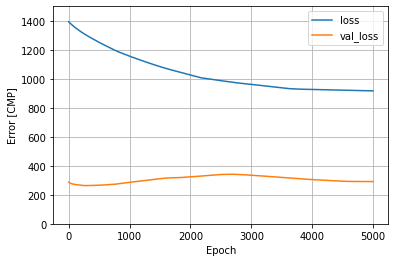

In [26]:
plot_loss(history)

In [27]:
test_results = {}

test_results['Market_Capitalization_model'] = Market_Capitalization_model.evaluate(
    test_features['Market_Capitalization'],
    test_labels, verbose=0)

In [28]:
x = tf.linspace(0.0, 250000, 10)
y = Market_Capitalization_model.predict(x)

In [29]:
def plot_Market_Capitalization(x, y):
  plt.scatter(train_features['Market_Capitalization'], train_labels, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Market_Capitalization')
  plt.ylabel('CMP')
  plt.legend()

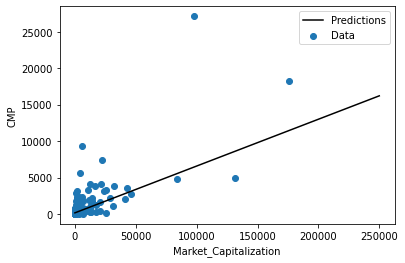

In [30]:
plot_Market_Capitalization(x,y)

In [31]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [32]:
linear_model.predict(train_features[:10])

array([[-1.027],
       [ 0.079],
       [ 0.508],
       [-0.629],
       [-1.517],
       [ 0.542],
       [-0.73 ],
       [ 0.308],
       [-0.89 ],
       [-0.185]], dtype=float32)

In [33]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.404],
       [ 0.503],
       [ 0.391],
       [-0.64 ],
       [-0.562],
       [-0.401],
       [ 0.034],
       [-0.309],
       [ 0.114],
       [-0.439],
       [-0.068]], dtype=float32)>

In [34]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [35]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=3000, # suppress logging
    verbose=0, # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 55.5 s, sys: 3.05 s, total: 58.6 s
Wall time: 53.2 s


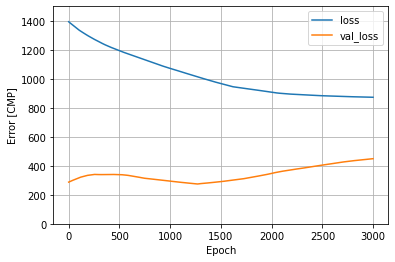

In [36]:
plot_loss(history)

In [37]:
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose=0)

In [38]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [39]:
dnn_Market_Capitalization_model = build_and_compile_model(Market_Capitalization_normalizer)

In [40]:
dnn_Market_Capitalization_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [41]:
%%time
history = dnn_Market_Capitalization_model.fit(
    train_features['Market_Capitalization'], train_labels,
    validation_split=0.2,
    verbose=0, epochs=3000)

CPU times: user 1min 1s, sys: 3.53 s, total: 1min 5s
Wall time: 59.3 s


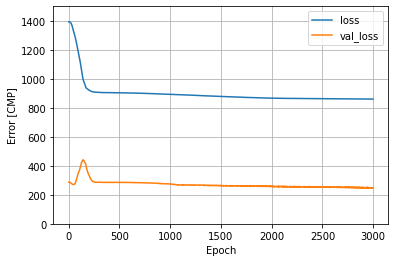

In [42]:
plot_loss(history)

In [43]:
x = tf.linspace(0.0, 100000, 10)
y = dnn_Market_Capitalization_model.predict(x)

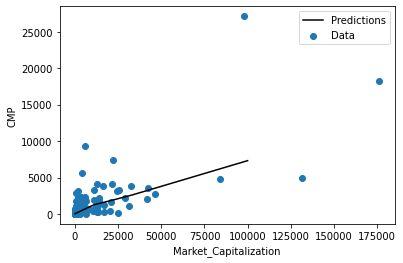

In [44]:
plot_Market_Capitalization(x, y)

In [46]:
test_results['dnn_Market_Capitalization_model'] = dnn_Market_Capitalization_model.evaluate(
    test_features['Market_Capitalization'], test_labels,
    verbose=0)

In [47]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 11)                23        
_________________________________________________________________
dense_5 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


In [48]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=5000)

CPU times: user 1min 43s, sys: 6.05 s, total: 1min 50s
Wall time: 1min 39s


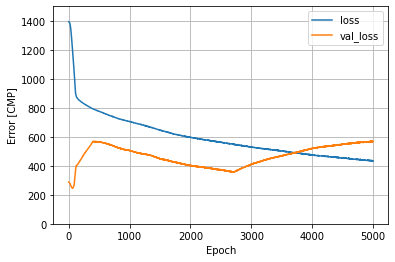

In [49]:
plot_loss(history)

In [50]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

In [51]:
pd.DataFrame(test_results, index=['Mean absolute error [CMP]']).T

,Mean absolute error [CMP]
Market_Capitalization_model,297.001923
linear_model,312.926880
dnn_Market_Capitalization_model,239.089767
dnn_model,555.261230


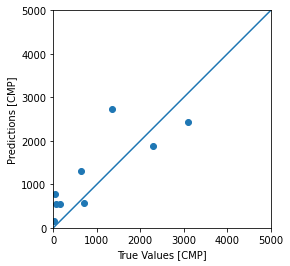

In [55]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [CMP]')
plt.ylabel('Predictions [CMP]')
lims = [0, 5000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


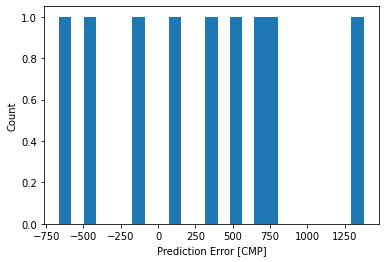

In [56]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [CMP]')
_ = plt.ylabel('Count')

In [57]:
dnn_model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model/assets


In [58]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

In [59]:
pd.DataFrame(test_results, index=['Mean absolute error [CMP]']).T

,Mean absolute error [CMP]
Market_Capitalization_model,297.001923
linear_model,312.926880
dnn_Market_Capitalization_model,239.089767
dnn_model,555.261230
reloaded,555.261230
